# Chapter XX -- Quantum Information

In this chapter we will discuss core concepts in quantum information.  Core principles are explained through the lens of photonic implementations of quantum infromation as this will be how we explore these concepts in the laboratory for this course.  However, you should note that these concepts extend to any quantum information system.  

This recitation will specifically cover the following topics:

1. Quantum Bits (qubits)
2. Quantum Gates
3. Quantum Teleportation
4. Quantum Error Correction
5. Quantum Cryptography
6. Quantum Key Distribution

## Packages, Functions and Variables

The following code-block contains the packages, functions and variables needed for the code found later in this notebook.  It must be run first.  Note that if you are running this on your personal computer, you should ensure that all packages needed are installed first (for example the [numpy](https://numpy.org/), [scipy](https://scipy.org/), and [matplotlib](https://matplotlib.org/) packages must be installed on your computer along with others).  You can find a launcher link at the top to conveniently run this notebook in Google Colab.  

The code below is hidden by default, but you are encouraged to expand it and study it.  The functions and constants will update as needed during the progression of the course, so you should note what new functions have been and added and study how they work.  

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
import h5py
from scipy import signal
from scipy.interpolate import UnivariateSpline 

# Import the matplotlib animation tools
# as well as the html tools for creating
# javascript animations
from matplotlib import animation, rc
from IPython.display import HTML

#-- Export Settings --
# If on, then it applies a few tweaks to make sure the export looks good
want_export=False

#--Physical Constants--
hbar = 1.054e-34 #normalized Planck constant [J*s]
evcon = 1.602e-19 #conversion factor, [J/eV]
eta = 119.91699832*np.pi #impedance of freespace [ohms]
me = 9.10938188e-31 #mass of electron [kg]
c = 2.99792458e8 #speed of light [m/s]
e = 1.602e-19 #electron charge [C]

## XX.1 Quantum Bits (qubits)

Analogous to the bit, the fundamental unit of information of classical computers, a quantum bit (qubit)
corresponds to a two level system. However, the qubit can have both values at the same time:

$\begin{equation}
\ket{\psi} = c_0 \ket{0} + c_1 \ket{1} 
\end{equation}$

where $c_i$ are complex numbers and $\sum_i c_i^2 = 1$. Physically, this state could be represented by the polarization
of a photon in a particular basis (e.g., linear or circular), the population of a photon in a particular mode, or the spin orientation of a spin-1/2 particle such as an electron or spin-1/2 nucleus.

Now let's consider two classical bits, which have four possible states: 

$\begin{equation} \lbrace 00, 01, 10, 11 \rbrace \end{equation}$

The quantum register consisting of two qubits is again in all four possible states at once:

$\begin{equation} \ket{\psi}  = c_{00}\ket{00} + c_{01}\ket{01} + c_{10}\ket{10} + c_{11}\ket{11} \end{equation}$

This simple example already shows one of the fundamental differences -- and potential strengths -- of the quantum register: it is in all states at once.  

For instance, suppose we wanted to represent the state of $N$ two-level particles, such as the polarization states of photons or the orientation of electron spins. This would us to store $2^N$ complex numbers, i.e., $2^{N+1}$ real numbers. Suppose each real number were stored in a 32-bit classical register. Then we'd need $32\times2^{N+1}$ bits. If $N=50$, that's already 4500 tera-bytes, and if $N=500$, we would require more bits than there are atoms in the universe (double-check!).  In a quantum computer, a register of 500 qubits would suffice! Thus, we already see that for certain applications -- like trying to simulate a quantum system -- the quantum memory is exponentially more powerful than a classical memory. The idea of using a quantum system for simulating a classical system was proposed by Richard Feynman in the early eighties, and is called quantum simulation. 

Going back to our two-level system, an important set of state are the Bell states:

$\begin{equation} \bigg \lbrace \frac{1}{\sqrt{2}} \big ( \ket{00} \pm \ket{11} \big ), \frac{1}{\sqrt{2}} \big (\ket{10} \pm \ket{01} \big ) \bigg \rbrace \end{equation}$

These are maximally entangled states. Let's consider one of these in more detail, say:

$\begin{equation} \ket{\beta_{00}} = \frac{1}{\sqrt{2}} \big ( \ket{00} + \ket{11} \big ) \end{equation}$

If we measure the first qubit, we obtain either '0' or '1' with equal probability. If we measure '1', then the state is projected to $\ket{\psi} = \ket{11}$; if we measure '0', then the state is projected to $\ket{\psi} = \ket{00}$. The measurement outcomes are correlated, even though the two qubits could be a different locations. 

## XX.2 Quantum Gates

### Single Qubit Gates

1. NOT Gate
   
   <br>
   
   $X = \ket{1} \bra{0} + \ket{0}\bra{1}$
   
   <br>
   
   $X\ket{\psi} = X(c_0 \ket{0} + c_1 \ket{1}) = c_0 \ket{1} + c_1 \ket{0}$
   
   <br>
   
   Photonic implementation: e.g., a half wave plate (HWP) at 45 degrees to the linear polarization basis.  Recall the Jones matrix for a HWP:
   
   <br>
   
   $\begin{equation}
   M_{\text{HWP}} = 
   \begin{pmatrix}
    \cos{2\theta} & \sin{2\theta} \\
    \sin{2\theta} & -\cos{2\theta}
   \end{pmatrix}
   \end{equation}$
   
   <br>
   
2. Z Gate

   <br>

   $Z = \ket{0} \bra{0} - \ket{1}\bra{1}$
   
   <br>   
   
   $Z\ket{\psi} = Z(c_0 \ket{0} + c_1 \ket{1}) = c_0 \ket{0} - c_1 \ket{1}$
   
   <br>
   
   Photonic implementation: e.g., a HWP with $\theta = 0$.
   
   <br>
   
3. Hadamard Gate

   <br>

   The purpose of this gate is to transform from the input basis to the complimentary basis.  In terms of a polarization basis, it would be essentially a rotation by 45 degrees.  

   <br>
   
   $H = \ket{0} \bra{0} + \ket{1}\bra{0} + \ket{0}\bra{1} - \ket{1}\bra{1}$
   
   <br>
   
   $H\ket{\psi} = H(c_0 \ket{0} + c_1 \ket{1}) = \frac{1}{\sqrt{2}} \big ( c_0 \ket{0} + c_0 \ket{1} + c_1\ket{0} - c_1\ket{1} \big )$
   
   <br>
   
   $\begin{equation}
   M_{\text{H}} = 
   \frac{1}{\sqrt{2}} 
   \begin{pmatrix}
    1 & 1 \\
    1 & -1
   \end{pmatrix}
   \end{equation}$
   
   <br>   
   
   Photonic implementation: for polarization states, a HWP at $\theta = 22.5^{\circ}$; for mode basis states, a beamsplitter.  



### Two Qubit Gates

1. Two-qubit CNOT

   <br>
   
   $CN = \frac{1}{\sqrt{2}} \big ( \ket{00}\bra{00} + \ket{01}\bra{01} + \ket{10}\bra{01} + \ket{10}\bra{10} \big )$
   
   <br>
   
   $\begin{equation}
   M_{\text{CN}} = 
   \frac{1}{\sqrt{2}} 
   \begin{pmatrix}
    1 & & 0 & 0 \\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0
   \end{pmatrix}
   \end{equation}$
   
   <br>
   
   Photonic implementation: two single qubit phase gates and two Hadamard gates (see single qubit gates above).  
   

## XX.3 Quantum Teleportation

Quantum teleportation is a technique that allows us to transfer a quantum state without physically moving the system that encodes the state. For instance, suppose Alice has a $\ket{\psi} = c_0 \ket{0} + c_1 \ket{1}$ encoded in two levels of a Cs atom in her setup in Pasadena, and suppose she wants to transfer this state to Bob's Cs atom in New York. It would be impractical to move the atom setup from Los Angeles to New York. Furthermore, Alice doesn't know the state $\ket{\psi}$ so measuring it would destroy it. Even if she did know the state, it would take infinitely long to transfer the information on the coefficients $c_0$ and $c_1$ since they're continuous variables. 

Alice and Bob can transfer the state if she and Bob also have access to one pair of an entangled state, let's say the Bell state $\beta_{00}$ discussed above. The entangled state could consist of two Cs atoms, one in each city. 

### Teleportation With CNOT

The protocol goes as follows. Alice begins with the product state of her state and $\beta_{00}$: 

$\begin{array}
 \ket{\psi_i} &= (c_0\ket{0} + c_1\ket{1}) \bigotimes \frac{1}{\sqrt{2}} \big ( \ket{0_A \times 0_B} + \ket{1_A \times 1_B} \big ) \\
              &= \frac{1}{\sqrt{2}} \bigg [ 
                  c_0 \ket{0} \big ( \ket{0_A \times 0_B} + \ket{1_A \times 1_B} \big ) + 
                  c_1 \ket{1} \big ( \ket{0_A \times 0_B} + \ket{1_A \times 1_B} \big )
                 \bigg ]
 \end{array}$
 
Alice then sends her two qubits through a CNOT gate: 

$\begin{array}
 \ket{\psi_1} = \frac{1}{\sqrt{2}} \bigg [ 
                & c_0 \ket{0} \big ( \ket{0_A \times 0_B} + \ket{1_A \times 1_B} \big ) + \\
                & c_1 \ket{1} \big ( \ket{1_A \times 0_B} + \ket{0_A \times 1_B} \big )
                \bigg ]  
 \end{array}$

... and then sends the first qubit through a Hadamard gate: 

$\begin{array}
 \ket{\psi_2} = \frac{1}{2} 
                \bigg [ 
                 &c_0 \big ( \ket{0} + \ket{1} \big ) \big ( \ket{0_A \times 0_B} + \ket{1_A \times 1_B} \big ) + \\
                 &c_1 \big ( \ket{0} - \ket{1} \big ) \big ( \ket{1_A \times 0_B} + \ket{0_A \times 1_B} \big )
                \bigg ]
 \end{array}$
 
$\begin{array}
 \ket{\psi_2} = \frac{1}{2} 
                \bigg [ 
                 & \ket{00_A} \big ( c_0 \ket{0_B} + c_1 \ket{1_B} \big ) + \\
                 & \ket{01_A} \big ( c_0 \ket{1_B} + c_1 \ket{0_B} \big ) + \\
                 & \ket{10_A} \big ( c_0 \ket{0_B} + c_1 \ket{1_B} \big ) + \\
                 & \ket{11_A} \big ( c_0 \ket{1_B} + c_1 \ket{0_B} \big )
                \bigg ]
 \end{array}$
 
Now Alice makes a joint measurement on her qubits.  She can obtain the following outcomes:

 * $00 \rightarrow \ket{\psi_3(00)} = c_0\ket{0_B} + c_1\ket{1_B} \rightarrow I \rightarrow \ket{\psi_4} = \ket{\psi}$
 * $01 \rightarrow \ket{\psi_3(01)} = c_0\ket{1_B} + c_1\ket{0_B} \rightarrow X \rightarrow \ket{\psi_4} = \ket{\psi}$
 * $10 \rightarrow \ket{\psi_3(10)} = c_0\ket{0_B} - c_1\ket{1_B} \rightarrow Z \rightarrow \ket{\psi_4} = \ket{\psi}$
 * $11 \rightarrow \ket{\psi_3(11)} = c_0\ket{1_B} - c_1\ket{0_B} \rightarrow ZX \rightarrow \ket{\psi_4} = \ket{\psi}$
 
Now Alice sends Bob the result of her measurement, so that Bob can apply one of four unique single qubit gates to recover the original state $\ket{\psi}$.  

Does teleportation violate the Theory of Relativity? No, because the protocol requires that Alice communicates the measurement result to Bob, and this (classical)  communication can't move faster than the speed of light. 

Teleportation shows that a quantum state can be moved between different physical informations. Quantum teleportation is also crucial for constructing gates that are protected from the environment, using redundant encoding in error correction codes. Quantum teleportation is also crucial for enabling efficient gates in certain quantum computation implementations, such as linear optics quantum computation.   

### Teleportation Without CNOT

We will consider a slightly different scheme that was used to experimentally implement quantum teleportation between two entangled photons. Assume these are in the state

$\ket{\psi_{AB}} = \frac{1}{\sqrt{2}} \big ( \ket{0_A \times 0_B} - \ket{1_A \times 1_B} \big )$

where again A and B are in possition by two Alice and Bob at different locations. Alice again has her state $\ket{\psi} = c_0\ket{0} + c_1\ket{1}$, and the full state at the beginning of the protocol is given by

$\begin{array}
 \ket{\psi_i} &= (c_0\ket{0} + c_1\ket{1}) \bigotimes \frac{1}{\sqrt{2}} \big ( \ket{0_A \times 0_B} + \ket{1_A \times 1_B} \big ) \\
              &= \frac{1}{\sqrt{2}} \bigg [ 
                  c_0 \ket{0} \big ( \ket{0_A \times 0_B} + \ket{1_A \times 1_B} \big ) + 
                  c_1 \ket{1} \big ( \ket{0_A \times 0_B} + \ket{1_A \times 1_B} \big )
                 \bigg ]
 \end{array}$
 
The four Bell states are given by:

$\ket{\Phi^{(\pm)}} = \frac{1}{\sqrt{2}} \big ( \ket{00} \pm \ket{11} \big )$

$\ket{\Psi^{(\pm)}} = \frac{1}{\sqrt{2}} \big ( \ket{01} \pm \ket{10} \big )$

The state $\ket{\psi_1}$ can be written in terms of the four Bell states:

*FIXME: SEEMS LIKE THERE IS MATERIAL MISSING HERE...*

## XX.4 Quantum Error Correction

````{margin}
```{note}
This section follows the discussion by M. A. Nielsen and I. L. Chuang, Quantum Computation and Quantum Information  (Cambridge Univ. Press, Cambridge, 2000), Chapter 10.
```
````

One of the primary challenges of quantum information processing is dealing with system-environment interactions. Quantum error correcting codes are a way to process quantum information reliably in the presence of noise.  Quantum error correction is a complex subject. Here, we'll consider just a simple example that protects against bit-flip errors in quantum channels. Bit flip errors is just one class of a range of sources of noise, which also include phase flip errors. 

Let's first consider an example of consider error correction codes: majority voting with three bits. Suppose you have a classical bit in a noisy channel, where the channel just refers to a path in space or time.  The channel could represent a photon flying from point A to B in a fiber, or a magnetic domain in a hard drive sitting there for some time interval.  Suppose that the noise in the channel causes the bit to flip with some probability p over the duration of the channel. In certain applications, a single bit error could have serious consequences, so we'd like to protect the bit.  We can do this by encoding it in redundant bits. To be specific, let's copy the single bit into three bits:

$0 \rightarrow 000$

$1 \rightarrow 111$

The noisy channel could cause bit flips such as $000 \rightarrow 001$, which happens with a probability of $p$. In majority voting, we would set the register back to $000$ after the channel. Clearly, if two or more bits flip, then majority voting fails. This happens with probability given by binomial statistics:

$\begin{eqnarray}
  P_\text{fail} =& \sum_{n=2}^3 p^n (1-p)^{3-n} 
   \begin{pmatrix}
     3 \\
     n
   \end{pmatrix} \\
   =& 3 p^2 (1 - p) + p^3 = 3 p^2 - 2 p^3
 \end{eqnarray}$

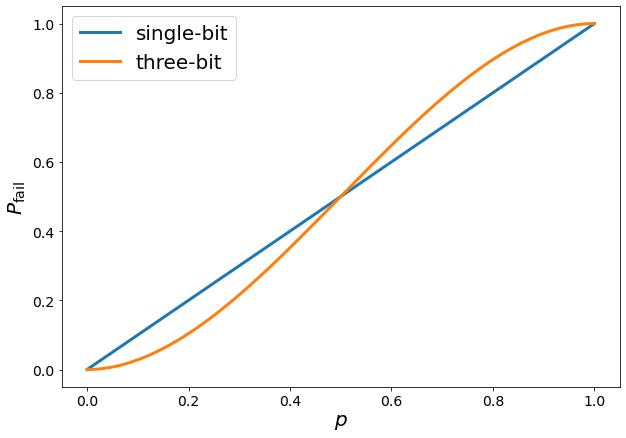

In [26]:
fig = plt.figure()
fig.set_size_inches(10, 7)

p = np.linspace(0, 1, 1000)
P_fail_1 = p
P_fail_3 = 3*p**2 - 2*p**3

plt.plot(p, P_fail_1, label='single-bit', linewidth=3);
plt.plot(p, P_fail_3, label='three-bit', linewidth=3);
plt.legend(fontsize=20)
plt.xlabel('$p$', fontsize=20)
plt.ylabel('$P_\mathrm{fail}$', fontsize=20)
plt.tick_params(labelsize='14')

We see that the majority voting code is better if $p<1/2$.

The quantum error correction code must overcome three major difficulties: (1) we can't copy a quantum state; (2) errors are continuous (not discrete, as for the classical system); (3) we can't measure an unknown quantum state without perturbing it. 

The following example illustrates that quantum error correction is nevertheless possible and improves on the stabilty of a qubit. In analogy to the classical code, let's consider encoding a qubit into three qubits. Consider a state

$\ket{\psi} = c_0 \ket{0} + c_1 \ket{1}$

and encode the basis states

$\ket{0} \rightarrow \ket{000}$

and

$\ket{1} \rightarrow \ket{111}$

where the encoding operation can be done with the following circuit involving two CNOT gates, where we use the notation that the channel with the solid circles is the control:

*FIXME: THIS FIGURE IS NOT VISIBLE TO ME WHEN I OPEN THE MATHEMATICA NOTEBOOK*

Thus our information is encoded in the state

$\ket{\psi'} = c_0\ket{000} + c_1\ket{111}$

Now we detect if a single bit is flipped using the following *error-detection projectors*:

$\begin{eqnarray}
P_0 =& \ket{000}\bra{000} + \ket{111}\bra{111} \\
P_1 =& \ket{100}\bra{100} + \ket{011}\bra{011} \\
P_2 =& \ket{010}\bra{010} + \ket{101}\bra{101} \\
P_3 =& \ket{001}\bra{001} + \ket{110}\bra{110}
 \end{eqnarray}$
 
Suppose that with probability $p$, one of the qubits flipped, producing, say, the state

$\ket{\psi''} = c_0 \ket{001} + c_1 \ket{110}$

Let's check the probabilties of measuring our different projectors:

$\begin{eqnarray}
p_0 =& \bra{\psi''}P_0\ket{\psi''} \\
p_1 =& \bra{\psi''}P_1\ket{\psi''} \\
p_2 =& \bra{\psi''}P_2\ket{\psi''} \\
p_3 =& \bra{\psi''}P_3\ket{\psi''}
 \end{eqnarray}$
 
So we would certainly measure $P_3$, telling us which of the bits was flipped. The state after the measurement is 

$\begin{eqnarray}
 \ket{\psi'''} = \frac{P_3 \ket{\psi''}}{\bra{\psi''}P_3\ket{\psi''}} =& c_0\ket{001} + c_1\ket{110} \\
               =& \ket{\psi}
 \end{eqnarray}$

*i.e.*, the error-detection projector did not change the state! Thus we didn't learn anything more about the coefficients in

$\ket{\psi'} = c_0\ket{000} + c_1\ket{111}$

so the state is still protected. All four error detection operators have this property. 

Conditional on the outcome of the measurement by $P_i$, we can finally restore the state by applying a NOT to the $i^{\text{th}}$ qubit, i.e., by applying $X_i$.  

Clearly, our procedure does not work when two or more spin flips have occurred. Thus, the error correction again fails with probabilty

$\begin{eqnarray}
  P_\text{fail} =& \sum_{n=2}^3 p^n (1-p)^{3-n} 
   \begin{pmatrix}
     3 \\
     n
   \end{pmatrix} \\
   =& 3 p^2 (1 - p) + p^3 = 3 p^2 - 2 p^3
 \end{eqnarray}$
 
just like for the classical error correction code. 

## XX.5 Entanglement-Based QKD

Alice and Bob share many entangled photon pairs of the form

$\ket{\psi} = \frac{\ket{XX} + \ket{YY}}{\sqrt{2}}$

where $x$ and $y$ are two orthogonal states; for example, $x$ and $y$ could refer to the polarization states of a photon.  We can consider another basis,

$\ket{u} = \frac{\ket{x} + \ket{y}}{\sqrt{2}}, \ket{v} = \frac{\ket{x} - \ket{y}}{\sqrt{2}} \text{.}$

Note, the states are then also maximally entangled:

$\ket{\psi} = \frac{1}{\sqrt{2}} \bigg ( \frac{\ket{u} + \ket{v}}{\sqrt{2}} \frac{\ket{u} + \ket{v}}{\sqrt{2}} + 
              \frac{\ket{u} - \ket{v}}{\sqrt{2}} \frac{\ket{u} - \ket{v}}{\sqrt{2}} \bigg )$
              
$\ket{\psi} = \frac{1}{\sqrt{2}} \frac{\ket{uu} + \ket{vv}}{\sqrt{2}}$

Thus, whether Alice and Bob both measure in the x-y basis or both in the u-v basis, their results will be perfectly correlated. If they measure in different bases, their measurements are completely uncorrelated. Alice and Bob publically compare their basis choice and agree to keep only those cases where they chose the same basis. This forms the *sifted key*.

Any communication will have some chance of errors, and QKD is no exception. These errors are mostly related to experimental imperfections -- for instance, imperfect detectors, lossy channels, etc. Importantly, errors can also come from eavesdropping! We therefore need to employ error correction to achieve noise-free communication. 

Alice, Bob, and Eve possess strings $X$, $Y$, an $Z$ after the key sifting. Alice sends Bob a message $U$ so that knowledge of $Y$ and $U$ leaves little uncertainty of $X$. 

To see this we can use the Shannon entropy function

$H(X) = -\sum_x p(x) \log_2 p(x)$

... and the conditional entropy function

$H(X|Y = y) = \sum_y p(y) H(X | Y = y)$

The message $U$ should give Bob enough information so that

$H(X|Y U) \approx 0$

*FIXME -- CONTINUE FROM HERE*